# P13-1 실습 과제
##Mini-batch size & Learning Rate 튜닝

Train on 500 samples, validate on 500 samples
Epoch 1/150
500/500 - 6s - loss: 2.2503 - accuracy: 0.3980 - val_loss: 1.3335 - val_accuracy: 0.5560
Epoch 2/150
500/500 - 5s - loss: 1.2000 - accuracy: 0.5580 - val_loss: 0.8833 - val_accuracy: 0.6700
Epoch 3/150
500/500 - 5s - loss: 1.1989 - accuracy: 0.5780 - val_loss: 1.2186 - val_accuracy: 0.6420
Epoch 4/150
500/500 - 6s - loss: 1.0001 - accuracy: 0.6440 - val_loss: 0.6841 - val_accuracy: 0.7140
Epoch 5/150
500/500 - 6s - loss: 0.7780 - accuracy: 0.6360 - val_loss: 1.1509 - val_accuracy: 0.4900
Epoch 6/150
500/500 - 7s - loss: 1.6702 - accuracy: 0.5380 - val_loss: 1.3617 - val_accuracy: 0.5920
Epoch 7/150
500/500 - 7s - loss: 1.8159 - accuracy: 0.5660 - val_loss: 1.2748 - val_accuracy: 0.5980
Epoch 8/150
500/500 - 7s - loss: 1.1938 - accuracy: 0.6340 - val_loss: 0.7181 - val_accuracy: 0.7240
Epoch 9/150
500/500 - 7s - loss: 1.0871 - accuracy: 0.6420 - val_loss: 0.7670 - val_accuracy: 0.7060
Epoch 10/150
500/500 - 6s - loss: 0.9182 - ac

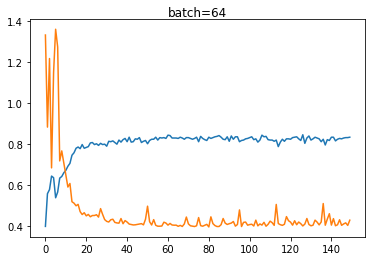

In [1]:
# mlp for the blobs problem with minibatch gradient descent with varied batch size
# 아래의 코드에서 다음 두 개의 파라미터를 조합하여 최고의 모델링 성능을 내고 그 결과를 print()로 출력하십시오.
# 튜닝할 파라미터 : batch_size & lr (각각 3가지의 옵션이 있으므로 두 파라미터를 조합할 수 있는 경우의 수는 모두 9가지)
# 모델의 성능 평가 기준은 다음의 우선순위에 따라 결정하시오. 
# 1. Validation Loss가 최소, 2. Accuracy는 최고값에 가까울 것
# 9번의 실험 후 최적이라고 생각되는 파라미터 값을 코드에 지정하고 셀을 다시 run하여 최종 결과를 출력하시오.

from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	
  # define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	
  # lr의 값을  0.1, 0.01, 0.001 중에서 선택하여 이곳에 지정
	opt = SGD(lr=0.01, momentum=0.9) 
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=150, verbose=2, batch_size=n_batch)
	print('accuracy = ', format(history.history['accuracy'][149],".3f"), ' ', 'validation loss = ', format(history.history['val_loss'][149],".3f"))
  # plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)



# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# batch_size의 값을   16, 32, 64 중에서 선택하여 이곳에 지정
batch_size = 64

fit_model(trainX, trainy, testX, testy, batch_size)
# show learning curves
pyplot.show()

# 결과를 메모장에 적어놓고 lr과 batch_size를 바꿔가며 최적의 파라미터를 찾아가시오.
# 최적의 lr과 batch_size를 선택하여 위의 코드에 적고 Run한 결과룰 출력하여 제출하시오. 